In [3]:
# Import required libraries

import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_profiling

In [4]:
# Load data

df = pd.read_csv('/Users/n1r7/Desktop/pytorch/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')

In [5]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
pandas_profiling.ProfileReport(df)

Number of variables,8
Number of observations,120000
Total Missing (%),0.0%
Total size in memory,7.3 MiB
Average record size in memory,64.0 B
Numeric,6
Categorical,0
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
# FEATURE ENGINEERING

In [6]:
# 1. Calculate distance between pickup and dropoff

In [7]:
# Define the haversine function that calculates distance between coordinates

def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [10]:
# 2. Extract granular information from pickup_datetime

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [12]:
# Convert object to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [14]:
# Review the first item of the converted type
df['pickup_datetime'][0]

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [15]:
# Convert time zone from UTC to EDT
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [16]:
# Extract hour number
df['Hour'] = df['EDTdate'].dt.hour


# Extract AM or PM
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

# Extract day of week
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df['DayOfWeek'] = df['EDTdate'].dt.dayofweek

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday,DayOfWeek
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon,0
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat,5
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat,5
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun,6
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri,4


In [18]:
# 3. SEPARATE CATEGORICAL FROM CONTINUOUS DATA

In [19]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday',
       'DayOfWeek'],
      dtype='object')

In [20]:
cat_cols = ['Hour','AMorPM','Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [21]:
y_col = ['fare_amount'] # this is the column we want to predict

In [22]:
# convert categorical columns to have categorical datatype

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
DayOfWeek                          int64
dtype: object

In [24]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [25]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
DayOfWeek                          int64
dtype: object

In [26]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [27]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [28]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [29]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [30]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
5         4
6         0
7         4
8         5
9         0
10        4
11        4
12        0
13        2
14        6
15        5
16        4
17        4
18        6
19        5
20        5
21        1
22        5
23        5
24        6
25        2
26        3
27        4
28        0
29        5
         ..
119970    3
119971    4
119972    0
119973    2
119974    2
119975    5
119976    5
119977    5
119978    3
119979    6
119980    6
119981    4
119982    6
119983    6
119984    0
119985    1
119986    0
119987    1
119988    3
119989    2
119990    3
119991    1
119992    0
119993    1
119994    3
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [31]:
df['Weekday'].cat.codes.values # stores values as numpy array

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [32]:
# Convert to values
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [33]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [34]:
# Stack converted values in a single array
cats = np.stack([hr,ampm,wkdy],axis=1)

In [35]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [36]:
# Can be shortened with list comprehension:
# cat_cols = ['Hour','AMorPM','Weekday']
# for cat in cat_cols:
#    df[cat] = df[cat].astype('category')
# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [37]:
# Convert numpy arrays to tensors
cats = torch.tensor(cats,dtype=torch.int64) #categorical arrays

In [38]:
conts = np.stack([df[col].values for col in cont_cols],axis=1) #continuous arrays

In [39]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [40]:
conts = torch.tensor(conts,dtype=torch.float)

In [41]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [42]:
y = torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1) # calling fare amount column
# reshape(-1,1) confirms that the column shape is kept vs. one long flat array

In [43]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [44]:
cats.shape

torch.Size([120000, 3])

In [45]:
conts.shape

torch.Size([120000, 6])

In [46]:
y.shape

torch.Size([120000, 1])

In [47]:
# Set up embeddings layer for categorical data
# One-hot encoding for categories
# Can also work for word embeddings with word index

In [48]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [49]:
cat_szs # number of unique categories

[24, 2, 7]

In [50]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs] 
# divide the number of unique entries in each column by 2, but max at 50

In [51]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [52]:
# TABULAR MODEL

In [53]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [69]:
catz = cats[:2]

In [70]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [71]:
[nn.Embedding(ni,nf) for ni,nf in emb_szs]
# go through tuples of number of categories and embedding size

[Embedding(24, 12), Embedding(2, 1), Embedding(7, 4)]

In [72]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [73]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [74]:
# Forward method (categories)
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [75]:
embeddingz

[tensor([[ 0.8382, -1.8075, -0.1286, -1.5243,  0.1285, -0.6952, -1.2111, -0.4585,
          -1.2536,  0.4464, -0.1236, -0.6842],
         [ 1.1286, -0.8006, -0.7668, -0.7697,  2.2199,  0.4009, -0.3855,  0.5025,
          -1.3034, -1.5069,  1.4334,  1.5756]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.3086],
         [-1.3086]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.4280, -1.7544, -0.0287, -0.7582],
         [ 1.4039, -0.7998, -0.6506, -0.1042]], grad_fn=<EmbeddingBackward>)]

In [63]:
z = torch.cat(embeddingz,1) # z is the output, concatenate to one tensor

In [64]:
z

tensor([[ 1.2620,  0.1527, -0.4261,  1.2807,  0.1313,  0.6152,  0.4684, -0.6487,
          0.9610, -1.9398,  0.6381,  0.9883, -1.1586, -0.2982,  0.2014,  1.5153,
         -1.8623],
        [-0.6187, -0.0355, -0.2412, -0.7385, -0.2071, -0.1202,  1.4202,  1.0830,
         -0.7754, -2.0434, -0.3281,  0.1456, -1.1586, -0.5282, -0.2829,  0.1143,
          0.7093],
        [-1.0988, -0.7015,  0.0562,  0.2137,  0.5040,  0.8069, -0.8324,  0.3742,
          0.2654,  0.2860, -1.0359,  0.8221, -1.1586, -0.5282, -0.2829,  0.1143,
          0.7093],
        [ 0.2429,  0.6963,  0.0128,  0.1683, -0.9178, -1.1537,  0.1701,  0.9547,
         -1.0911,  1.8447,  1.5509, -1.2563,  1.0789, -0.9523, -0.4063, -1.9646,
          1.2408]], grad_fn=<CatBackward>)

In [66]:
selfembdrop = nn.Dropout(0.4) # drop % of categories to avoid overfitting

In [67]:
z = selfembdrop(z)

In [68]:
z

tensor([[ 0.0000,  0.2545, -0.7101,  2.1345,  0.2189,  0.0000,  0.0000, -1.0812,
          1.6017, -0.0000,  0.0000,  0.0000, -1.9310, -0.4971,  0.0000,  0.0000,
         -3.1039],
        [-0.0000, -0.0592, -0.4019, -1.2309, -0.0000, -0.2004,  2.3669,  0.0000,
         -1.2923, -3.4057, -0.5468,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000,
          1.1822],
        [-1.8313, -1.1691,  0.0937,  0.0000,  0.8400,  0.0000, -0.0000,  0.6237,
          0.4423,  0.0000, -1.7265,  0.0000, -1.9310, -0.8803, -0.4716,  0.1905,
          0.0000],
        [ 0.4048,  1.1605,  0.0213,  0.0000, -1.5297, -0.0000,  0.2835,  1.5911,
         -1.8185,  3.0745,  2.5849, -0.0000,  1.7982, -0.0000, -0.0000, -0.0000,
          2.0681]], grad_fn=<MulBackward0>)

In [78]:
# Build TabularModel class

class TabularModel(nn.Module):
    
    def __init__(self,emb_szs,n_cont,out_sz,layers,p=0.5): # p = probability of dropout layers
        
        # layers = [200,100,50]
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont) # normalize continuous data
        
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs]) # number of embeddings
        n_in = n_emb + n_cont # number of all inputs (embedded and continuous)
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) # fully connected
            layerlist.append(nn.ReLU(inplace=True)) # append rectified linear activation
            layerlist.append(nn.BatchNorm1d(i)) # append normalization
            layerlist.append(nn.Dropout(p)) # append a dropout
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [79]:
# TabularModel(emb_szs, n_cont, out_sz, layers, p=0.5)
# emb_szs defined earlier
# n_cont = conts.shape[1] because we need the number of continuous features we have--the 1 index is the number of columns
# out_sz = 1 because regression predicts single value
# layers = [number of neurons in first layers, number of neurons in second layer, ...]
# p = probability of dropout

torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [80]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [81]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) # adjust learning rate depending on model

In [82]:
# Train / Test splits

In [83]:
# reduce batch size
batch_size = 60000
test_size = int(batch_size*0.2)

In [84]:
# Data shuffled already, so no further shuffling is required
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [85]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [89]:
print(f'cat_train {len(cat_train)}  cat_test {len(cat_test)}')
print(f'con_train {len(con_train)}  con_test {len(con_test)}')

cat_train 48000  cat_test 12000
con_train 48000  con_test 12000


In [91]:
# track how long it takes the model to run
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train)) # RMSE
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.084604263305664
epoch: 11 loss is 11.657569885253906
epoch: 21 loss is 11.241671562194824
epoch: 31 loss is 10.826104164123535
epoch: 41 loss is 10.39664077758789
epoch: 51 loss is 10.002227783203125
epoch: 61 loss is 9.629165649414062
epoch: 71 loss is 9.305058479309082
epoch: 81 loss is 8.993762969970703
epoch: 91 loss is 8.679099082946777
epoch: 101 loss is 8.328348159790039
epoch: 111 loss is 7.94910192489624
epoch: 121 loss is 7.529775619506836
epoch: 131 loss is 7.097434043884277
epoch: 141 loss is 6.641471862792969
epoch: 151 loss is 6.136799335479736
epoch: 161 loss is 5.640181541442871
epoch: 171 loss is 5.159248352050781
epoch: 181 loss is 4.707404613494873
epoch: 191 loss is 4.290948867797852
epoch: 201 loss is 3.9422037601470947
epoch: 211 loss is 3.7090916633605957
epoch: 221 loss is 3.5646684169769287
epoch: 231 loss is 3.51912784576416
epoch: 241 loss is 3.4557979106903076
epoch: 251 loss is 3.459679365158081
epoch: 261 loss is 3.430006504058838
epoch

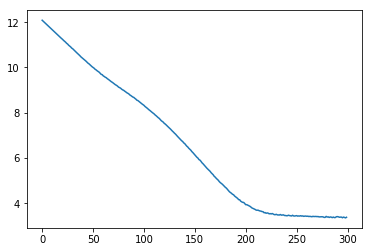

In [92]:
plt.plot(range(epochs),losses)

In [93]:
# Validate the model on the test set

In [94]:
with torch.no_grad():
    
    y_val = model(cat_test,con_test)
    
    loss = torch.sqrt(criterion(y_val,y_test))

In [95]:
loss

tensor(3.3392)

In [102]:
for i in range(10):

    diff = np.abs(y_val[i].item()-y_test[i].item())
    
    print(f'{i}.) PREDICTED: {y_val[i].item():8.2f}   TRUE: {y_test[i].item():8.2f}   DIFF: {diff:8.2f}')

0.) PREDICTED:     5.18   TRUE:     2.90   DIFF:     2.28
1.) PREDICTED:    22.51   TRUE:     5.70   DIFF:    16.81
2.) PREDICTED:     7.08   TRUE:     7.70   DIFF:     0.62
3.) PREDICTED:    13.03   TRUE:    12.50   DIFF:     0.53
4.) PREDICTED:     4.36   TRUE:     4.10   DIFF:     0.26
5.) PREDICTED:     4.29   TRUE:     5.30   DIFF:     1.01
6.) PREDICTED:     1.93   TRUE:     3.70   DIFF:     1.77
7.) PREDICTED:    18.70   TRUE:    14.50   DIFF:     4.20
8.) PREDICTED:     3.99   TRUE:     5.70   DIFF:     1.71
9.) PREDICTED:    11.53   TRUE:    10.10   DIFF:     1.43


In [103]:
# Save the model

In [104]:
torch.save(model.state_dict(),'TaxiModel.pt')

In [1]:
# Predict with new data

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

In [6]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 2, [200,100], p=0.4)

In [12]:
model2.load_state_dict(torch.load('/Users/n1r7/Desktop/pytorch/PYTORCH_NOTEBOOKS/02-ANN-Artificial-Neural-Networks/TaxiModel.pt'));
model2.eval()

RuntimeError: Error(s) in loading state_dict for TabularModel:
	size mismatch for layers.8.weight: copying a param with shape torch.Size([1, 100]) from checkpoint, the shape in current model is torch.Size([2, 100]).
	size mismatch for layers.8.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([2]).